**Assignment:** 

Create/Write a function / dataset that has an image name or an image and recognizes if image is cat or dog.

AUC/ROC and Confusion Matrix

*************************************************************************************************************************************************************************************************************************************

# Importing Libraries & Modules

*************************************************************************************************************************************************************************************************************************************

**Basics**

In [1]:
import pandas as pd
import numpy as np 

**OS**

In [2]:
import os
from os import makedirs
from os import listdir
from pathlib import Path

**Visuals**

In [3]:
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

**SciKit-Learn Metrics & Modelings**

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score

**Tensorflow**

In [7]:
import tensorflow as tensorflow

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print(tensorflow.__version__)
print(keras.__version__)

2.19.0
3.9.1


**Random**

In [8]:
import random
from random import seed
from shutil import copyfile

import warnings
warnings.filterwarnings('ignore')

**SEED**

In [9]:
SEED = 4
random.seed(SEED)
np.random.seed(SEED)
tensorflow.random.set_seed(SEED)
tensorflow.keras.utils.set_random_seed(SEED)

*************************************************************************************************************************************************************************************************************************************

# Reading & Testing Datafiles

*************************************************************************************************************************************************************************************************************************************

In [10]:
path = r'C:\Users\ramad\Desktop\CODING\Spreadsheets\Dogs vs Cats\train'
path

'C:\\Users\\ramad\\Desktop\\CODING\\Spreadsheets\\Dogs vs Cats\\train'

 1. Creating empty list ("img_list") to store the names of image files found in a specified directory

 2. Creating a "forloop" iterates through each file within the directory specified by the path variable. 
 
 3. os.listdir(path) returns a list of all the names of entries in the directory given by path

 4. Creating a filetype filter: Within the forloop, the "if" statement checks if the current file name ends with either .jpg or .png. This is a way to filter out files that are not JPEG or PNG images.

 5. If the logic condition is true (i.e., file is a JPEG or PNG image), this line appends the file name to the img_list

In [11]:
img_list = []

for file in os.listdir(path):
    if file.endswith('.jpg') or file.endswith('.png'):
        img_list.append(file)

In [12]:
len(img_list)

25000

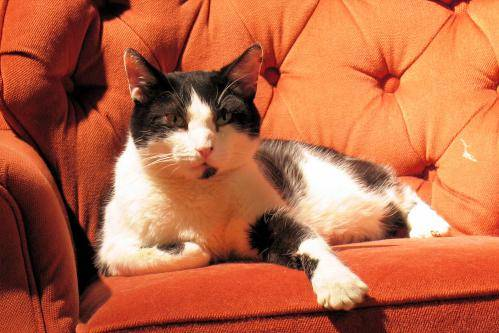

In [13]:
img_cat_10897 = load_img(r"C:\Users\ramad\Desktop\CODING\Spreadsheets\Dogs vs Cats\train\cat.10897.jpg")
img_cat_10897

*************************************************************************************************************************************************************************************************************************************

# Preparing Data for Machine Learning

*************************************************************************************************************************************************************************************************************************************

*This function prepares image data for machine learning tasks in 7 steps by dividing it into three distinct sets, while preserving the class balance.*

**Steps:**

1. Defining Function and Related Preparation Parameters: ("path", "val_size", "test_size", "random_state")

2. Extracting Filenames and Categories: ("Dog" or not "Dog")

3. Creating Pandas DataFrame: ("pd.DataFrame")

4. Funneling Sets into Dataframes by employing train_test_split to Split Training and Temporary Sets: ("train_df", "temp_df")

5. Creating a Validation ratio ("val_ratio") for use in making a Validation DataFrame: ("val_df") 

6. Splitting the Temporary Set into Validation and Test Sets: ("val_df", "test_df") 

7. Returning the Split DataFrames: "train_df", "val_df", "test_df"


In [14]:
def prepare_data(path, val_size=0.15, test_size=0.15, random_state=4):

    train_filenames = os.listdir(path)
    train_categories = [1 if filename.split(".")[0] == 'dog' else 0 for filename in train_filenames]

    df = pd.DataFrame({
        'filename': train_filenames,
        'category': train_categories
    })

    
    train_df, temp_df = train_test_split(df, test_size=(val_size + test_size), stratify=df["category"], random_state=random_state)

    val_ratio = val_size / (val_size + test_size)  
    val_df, test_df = train_test_split(temp_df, test_size=(1 - val_ratio), stratify=temp_df["category"], random_state=random_state)

    return train_df, val_df, test_df

*Ensuring correct split value counts*

In [15]:
train_df, val_df, test_df = prepare_data(path)
print(f"Total Training Images: {len(train_df)}")
print(f"Total Validation Images: {len(val_df)}")
print(f"Total Test Images: {len(test_df)}")

Total Training Images: 17500
Total Validation Images: 3750
Total Test Images: 3750


*************************************************************************************************************************************************************************************************************************************

# Subsampled Dataset

*************************************************************************************************************************************************************************************************************************************

In [16]:
import shutil

*This function organizes an image subset from a source directory into category-specific subdirectories ("dogs" and "cats") within a specified base directory ("cats_vs_dogs"), using information from a Pandas DataFrame. This is conducted in a 7 steps:*

**Steps:**

1. Defining function and parameters

2. Defining Category Directories for Dogs & Cats: ("os.path.join")

3. Creating Category Directories for Dogs & Cats: ("os.makedirs")

4. Setting the Source Path: ("Path")

5. Creating forloop - Branding cats as 0 and dogs as 1 in respective directories to iterate through Categories 

6. Creating forloop to iterate through filenames for Each Category

7. Copying Images: ("shutil.copyfile")

In [17]:
def subsampled_dataset(df, source_path, base_dir, dataset_type):
    dogs_dir = os.path.join(base_dir, dataset_type, "dogs")
    cats_dir = os.path.join(base_dir, dataset_type, "cats")
    os.makedirs(dogs_dir, exist_ok=True)
    os.makedirs(cats_dir, exist_ok=True)
    source_path = Path(source_path)

    for category, num, folder in [("cat", 0, cats_dir), ("dog", 1, dogs_dir)]:
        for i, filename in enumerate(df[df["category"] == num]["filename"]):
            src = source_path / filename
            dst = os.path.join(folder, f"{category}{i}.jpg") 
            shutil.copyfile(src, dst)

Defining specified Base directory

In [18]:
base_dir = "cats_vs_dogs"

**Subsampled Dataset** 

*A function that takes a Pandas DataFrame (df), a source path (source_path), a base directory (base_dir), and a dataset type (dataset_type) as inputs. Its purpose is to copy image files from the source directory into organized subdirectories based on their categories (cats and dogs).*

In [19]:
subsampled_dataset(train_df, path, base_dir, "train")

In [20]:
subsampled_dataset(test_df, path, base_dir, "test")

In [21]:
subsampled_dataset(val_df, path, base_dir, "validation")

*************************************************************************************************************************************************************************************************************************************

# Visualizing Sample Data & Corresponding Labels

*************************************************************************************************************************************************************************************************************************************

*This function provides a convenient way to visualize a random sample of images from the dataset, along with their corresponding labels.*

**STEPS:**

1. Defining Function and Parameters

2. Sampling Data

3. Creating Subplots

4. Iterating through Images

5.  Loading & Processing Images

In [22]:
def display_images(df, image_path, num_images=25):

    sample_data = df.sample(n=num_images).reset_index(drop=True)

    fig, axes = plt.subplots(1, num_images, figsize=(20, 10))
    
    for i, ax in enumerate(axes):
        filename = sample_data.loc[i, "filename"]
        img = Image.open(os.path.join(image_path, filename))

        img = img.resize((128, 128))
        
        label = "Dog" if sample_data.loc[i, "category"] == 1 else "Cat"

        ax.imshow(img)
        ax.set_title(label, fontsize=20)
        ax.axis("off")

6. Displaying Sampled Data/Images

<Figure size 640x480 with 0 Axes>

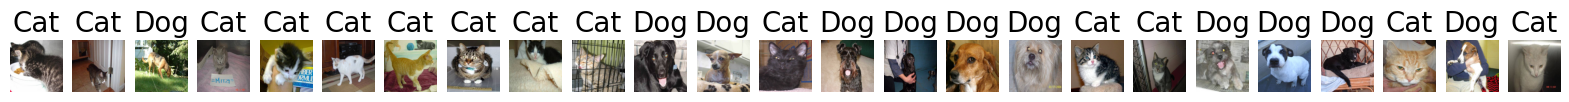

In [23]:
plt.tight_layout()
plt.show()

display_images(train_df, path)

*************************************************************************************************************************************************************************************************************************************

# Data Preprocesing

*************************************************************************************************************************************************************************************************************************************

*Specifies the directory containing the training images*

In [24]:
new_base_dir = Path(base_dir)

*"image_dataset_from_directory" loads image data from a directory structure. It automatically infers class labels from the subdirectory names within the specified directory.*

*"new_base_dir" is assumed to be a Path object (from the pathlib library) or a string representing the base directory.*

*"/train" appends the "train" subdirectory to the base path, indicating that the training images are located within a folder named "train" inside the new_base_dir.*

*The directory structure is expected to be organized such that each subdirectory within "train" represents a different class, and the images within each subdirectory belong to that class.*

*"batch_size=32":
This specifies that the dataset should be divided into batches of 32 images. During training, the model processes these batches of 32 images at a time. This is done for memory efficiency and to improve training speed.*

*"shuffle=True":
This shuffles the order of the images in the dataset. Shuffling is important to prevent the model from learning any biases related to the order of the data. It ensures that each batch contains a random selection of images.*

**Training Dataset**

In [25]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=4
)

Found 17500 files belonging to 2 classes.


**Validation Dataset**

In [26]:
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=4
)

Found 3750 files belonging to 2 classes.


**Test Dataset**

In [27]:
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=4
)

Found 3750 files belonging to 2 classes.


In [28]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)   
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


*************************************************************************************************************************************************************************************************************************************

# Modeling (Training Set)

*************************************************************************************************************************************************************************************************************************************

**Input Layers**

In [29]:
inputs = keras.Input(shape=(180, 180, 3))

**Conv Block 1**

In [30]:
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

**Conv Block 2**

In [31]:
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

**Conv Block 3**

In [32]:
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

**Conv Block 4**

In [33]:
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

**Conv Block 5**

In [34]:
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

**Flatten Layer**

In [35]:
x = layers.Flatten()(x)

**Outputs**

In [36]:
outputs = layers.Dense(1, activation="sigmoid")(x)

**Compile**

In [37]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
      optimizer="rmsprop",
      metrics=["accuracy"])

**Callbacks**

In [38]:
callbacks = [
keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch.keras",
 save_best_only=True,
 monitor="val_loss")
 ]

**Training Set Fitting**

In [39]:
history = model.fit(
    train_dataset,
    epochs=2,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 243s 441ms/step - accuracy: 0.5653 - loss: 0.6803 - val_accuracy: 0.7363 - val_loss: 0.5507
Epoch 2/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 214s 390ms/step - accuracy: 0.7466 - loss: 0.5169 - val_accuracy: 0.7997 - val_loss: 0.4369


**Summary**

In [40]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

*************************************************************************************************************************************************************************************************************************************

# Training Set Accuracy Evaluation (& Loss curves)

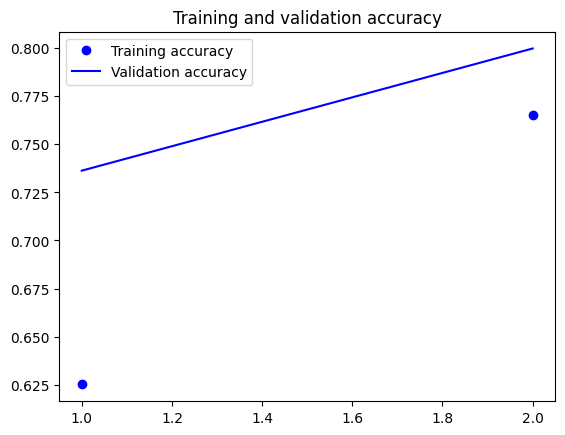

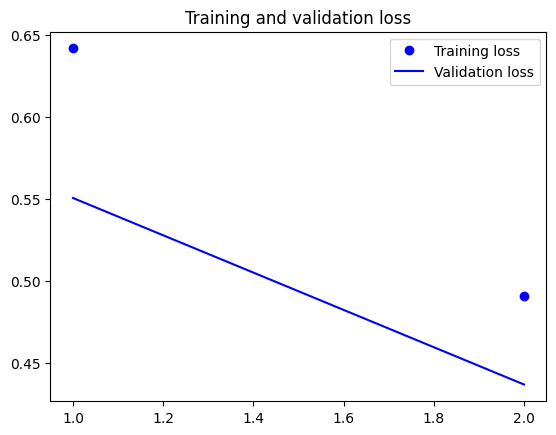

In [41]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


*************************************************************************************************************************************************************************************************************************************

# Transfer Learning "VGG16 Model" (Feature Extraction with Data Augmentation)

*************************************************************************************************************************************************************************************************************************************

In [42]:
from tensorflow.keras.applications.vgg16 import VGG16

*This code block loads the VGG16 model, removing its classification head, and prepares it to receive images of size 180x180x3.*

**Loading VGG Model**

In [43]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

**Architecture Summary Display:** 

Layer Type 

Output Shape 

Total Params 

Trainable Params 

Non-Trainable Params

In [44]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

**Non-trainable params:**

*This line of code, conv_base.trainable = False, is used in the context of transfer learning with pre-trained models in Keras (and TensorFlow).*

In [45]:
conv_base.trainable = False

**Inputs**

In [46]:
inputs = keras.Input(shape=(180, 180, 3))

**Data Augmentation**

In [47]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2),
    ])

x = data_augmentation(inputs) 

**Preprocessing Input:**

Channel Order

Pixel Value Normalization

In [48]:
x = keras.applications.vgg16.preprocess_input(x)

**Conv Block 1**

In [49]:
x = conv_base(x)

**Flatten Layer**

In [50]:
x = layers.Flatten()(x)

**Dense Layer**

In [51]:
x = layers.Dense(256)(x)

**Dropout Layer**

In [52]:
x = layers.Dropout(0.5)(x)

**Output Layers**

In [53]:
outputs = layers.Dense(1, activation="sigmoid")(x)

**Defining Model Architecture**

In [54]:
model3 = keras.Model(inputs, outputs)

**Compile**

In [55]:
model3.compile(loss="binary_crossentropy",
      optimizer="rmsprop",
      metrics=["accuracy"])

**Callbacks**

In [56]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
 ]

**Model Fitting**

*The training set's purpose is to allow the machine learning algorithm to identify patterns, relationships, and trends within the data. By analyzing the training data, the model adjusts its internal parameters to make accurate predictions or classifications.*

*"epoch" refers to one complete pass of the entire training dataset through the learning algorithm*

*"Validation Dataset" is used to evaluate the model during training and to tune hyperparameters.*

In [57]:
history = model3.fit(
    train_dataset,
    epochs=2,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 1444s 3s/step - accuracy: 0.9130 - loss: 16.2422 - val_accuracy: 0.9669 - val_loss: 3.9822
Epoch 2/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 1501s 3s/step - accuracy: 0.9523 - loss: 2.7822 - val_accuracy: 0.9552 - val_loss: 1.1056


*************************************************************************************************************************************************************************************************************************************

**Accuracy and Validation Loss (Training Set)**

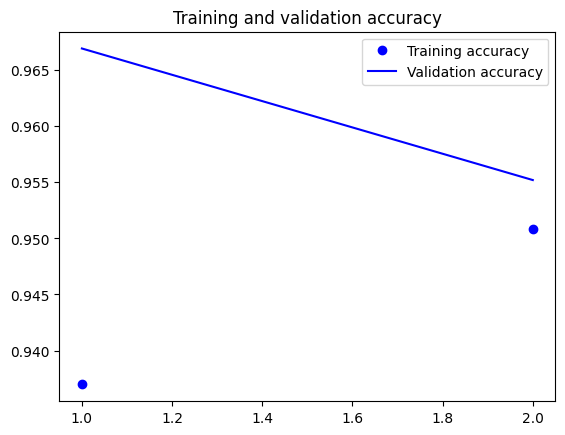

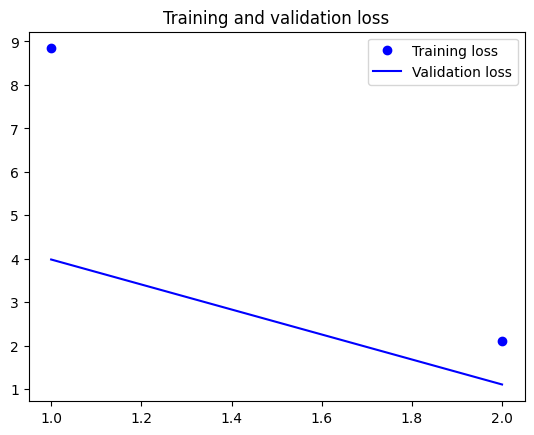

In [58]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Test Dataset Evaluation**

In [59]:
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9553 - loss: 0.9086
Test accuracy: 0.960


*************************************************************************************************************************************************************************************************************************************

**Confusion Matrix**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

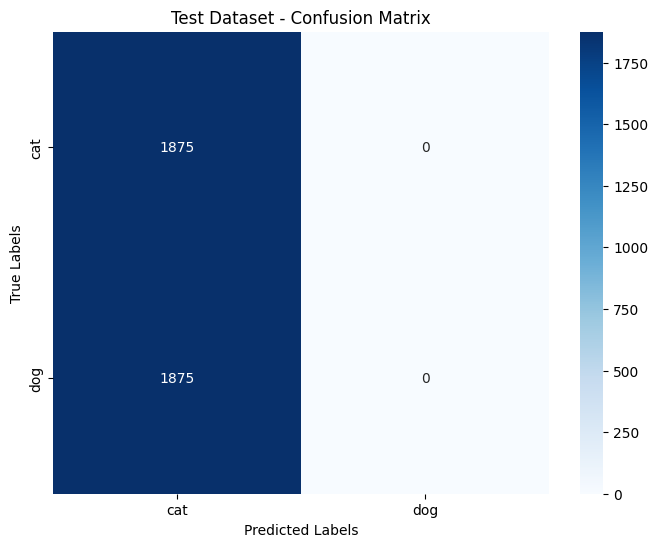

In [60]:
def plot_confusion_matrix(model, test_dataset, class_names = ['cat', 'dog']):
    y_true = []
    y_pred = []

    for images, labels in test_dataset:
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(model.predict(images), axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Test Dataset - Confusion Matrix')
    plt.show()

plot_confusion_matrix(keras.models.load_model("feature_extraction_with_data_augmentation.keras"), test_dataset)


**Predictions**

In [61]:
def display_predictions(model, test_dataset, num_images=9, class_names = ['cat', 'dog']):
    
    plt.figure(figsize=(10, 10))
    for images, labels in test_dataset.take(1):
        predictions = model.predict(images)
        
        for i in range(num_images):
            
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            
            predicted_class = class_names[np.argmax(predictions[i])]
            true_class = class_names[labels[i]]
            
            plt.title(f"Predicted: {predicted_class}, True: {true_class}")
            plt.axis("off")
            plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


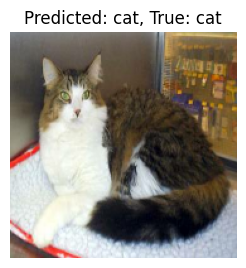

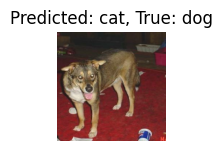

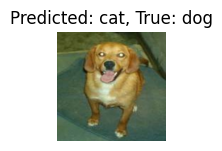

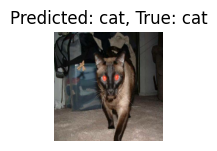

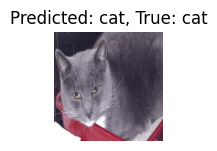

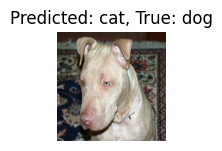

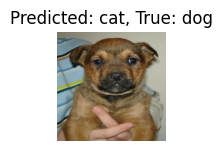

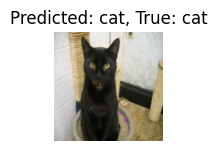

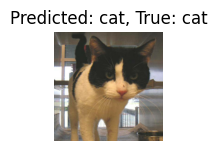

In [62]:
display_predictions(keras.models.load_model("feature_extraction_with_data_augmentation.keras"), test_dataset)

*************************************************************************************************************************************************************************************************************************************

# Fine-Tuned Model (RMSprop Optimizers from Tensorflow Keras)

*************************************************************************************************************************************************************************************************************************************

**Trainable Base**

*"conv_base.trainable = True:"* 

*This line sets the entire conv_base model (which is the VGG16 model) to be trainable.  By default, when you load a pre-trained model like VGG16, its weights are frozen (not trainable) to preserve the knowledge it has learned.* 

*Setting trainable = True makes all the layers' weights adjustable during training.*

In [63]:
conv_base.trainable = True
for layer in conv_base.layers[:-8]:
    layer.trainable = False

**Compile**

This code block configures the training process of the neural network model (model3) using the Keras library in TensorFlow:   

*model3.compile(...): This is the method used to prepare the model for training. It defines the key components that will be used during the training loop.* 

*loss="binary_crossentropy": This specifies the loss function.*   

*Binary cross-entropy is used for binary classification problems, where the goal is to predict one of two classes (in this case, "cat" or "dog").
It measures the difference between the model's predicted probabilities and the actual binary labels (0 or 1).*

*optimizer=keras.optimizers.RMSprop(learning_rate=1e-5): This sets the optimizer algorithm.*  

*keras.optimizers.RMSprop is an adaptive learning rate optimization algorithm. It's often a good choice for training neural networks.*

*learning_rate=1e-5 is a crucial parameter. It controls the step size the model takes to update its weights based on the calculated loss. A smaller learning rate (like 1e-5) is used here, which is important for fine-tuning.*
*When fine-tuning a pre-trained model, you typically use a smaller learning rate than when training from scratch. This is because you want to make smaller adjustments to the pre-trained weights to avoid disrupting the learned features too much.*
  

*metrics=["accuracy"]: This specifies that the "accuracy" metric will be calculated and reported during the training process.*   



In [64]:
model3.compile(loss="binary_crossentropy",
      optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
      metrics=["accuracy"])

**Callbacks**

In [65]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="fine_tuning.keras",
    save_best_only=True,
    monitor="val_loss")
 ]

**Model Fitting**

In [66]:
history = model3.fit(
    train_dataset,
    epochs=2,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 2168s 4s/step - accuracy: 0.9532 - loss: 0.3289 - val_accuracy: 0.9795 - val_loss: 0.0849
Epoch 2/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 2131s 4s/step - accuracy: 0.9677 - loss: 0.0943 - val_accuracy: 0.9845 - val_loss: 0.0832


**Training and Validation Loss**

In [67]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.9862 - loss: 0.0488
Test accuracy: 0.985


*************************************************************************************************************************************************************************************************************************************

 # Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

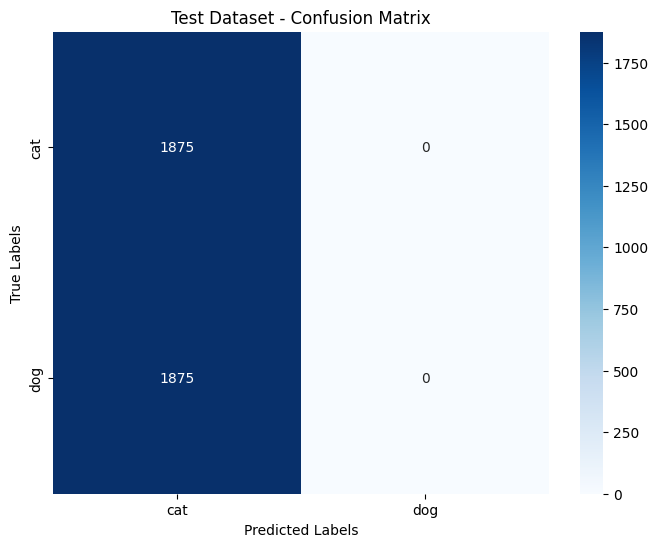

In [68]:
plot_confusion_matrix(keras.models.load_model("fine_tuning.keras"), test_dataset)

*************************************************************************************************************************************************************************************************************************************

 # Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


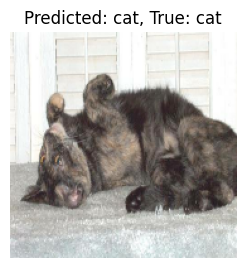

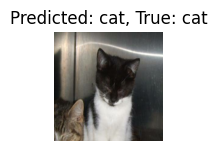

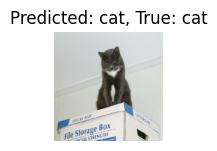

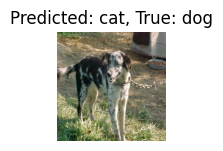

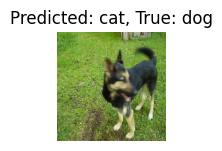

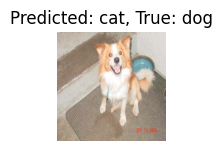

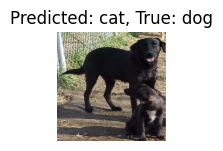

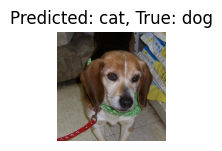

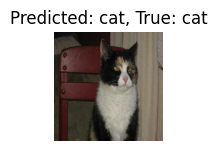

In [69]:
display_predictions(keras.models.load_model("fine_tuning.keras"), test_dataset)

*************************************************************************************************************************************************************************************************************************************

# Histogram

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing import image

In [75]:
def display_predictions(model, test_dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    class_names = ["Cat", "Dog"]
    probabilities = [] 

    for images, labels in test_dataset.take(1):
        raw_predictions = model.predict(images)
        predictions = np.round(raw_predictions).flatten() 
        
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            img = images[i].numpy().astype("uint8")
            plt.imshow(img)

            predicted_class = class_names[int(predictions[i])]
            true_class = class_names[int(labels[i])]
            probability = float(raw_predictions[i])
            probabilities.append(probability)
            title_color = "green" if predicted_class == true_class else "red"
            
            plt.title(f"Predicted: {predicted_class} ({probability:.2f})\nTrue: {true_class}", color=title_color)
            plt.axis("off")
            plt.show()
            
            plt.figure(figsize=(6, 6))
            plt.hist(probabilities, bins=20, color="skyblue", edgecolor="black")
            plt.title("Histogram of Predicted Probabilities")
            plt.xlabel("Probability of Being a Dog")
            plt.ylabel("Frequency")
            plt.show()
            
            model_path = "C:\\Users\\ramad\\Desktop\\CODING\\Jupiter Files\\fine_tuning.keras"
            loaded_model = keras.models.load_model(model_path)
            display_predictions(loaded_model, test_dataset)

*************************************************************************************************************************************************************************************************************************************

# ROC_AUC_SCORE

In [76]:
model = keras.models.load_model("fine_tuning.keras")

y_true = []
y_scores = []

for images, labels in test_dataset:
    y_true.extend(labels.numpy())
    y_scores.extend(model.predict(images).ravel())
    
y_true = np.array(y_true)
y_scores = np.array(y_scores)

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
roc_auc_score_value = roc_auc_score(y_true, y_scores)

print(f"AUC (from auc function): {roc_auc:.3f}")
print(f"ROC AUC Score: {roc_auc_score_value:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

*************************************************************************************************************************************************************************************************************************************

# Saving & Re-Loading

In [77]:
from tensorflow.keras.models import load_model

In [78]:
model.save(r'C:\Users\ramad\Desktop\CODING\Jupiter Files\fine_tuning.keras')

In [79]:
loaded_model = load_model('fine_tuning.keras')
loaded_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 180, 180,  │          0 │ input_layer_2[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 180, 180)  │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 180, 180)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 180, 180)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_8 (Stack)     │ (None, 180, 180,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 180, 180,  │          0 │ stack_8[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 5, 5, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 12800)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │  3,277,056 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │        257 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 34,248,516 (130.65 MB)

 Trainable params: 16,256,513 (62.01 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

 Optimizer params: 16,256,515 (62.01 MB)